In [61]:
import glob, os, sys, re
from collections import defaultdict, Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ete3
from ete3 import PhyloTree
from Bio import SeqIO
import tqdm

In [24]:
genes = ['A6', 'A8', 'CO1', 'CO2', 'CO3', 'Cytb', 'ND1', 'ND2', 'ND3', 'ND4', 'ND4L', 'ND5', 'ND6']
phylum = "Arthropoda"

In [60]:
seqs = defaultdict(list)
for gene in tqdm.tqdm(genes):
    inp = f"../data/MIDORI2/fasta/MIDORI2_UNIQ_NUC_GB253_{gene}_BLAST.fasta"
    for rec in SeqIO.parse(inp, "fasta"):
        header = rec.description
        
        if phylum not in header:
            continue

        raw_acc, taxa = header.split("###")
        acc, place = re.match("(\w+\.\d)\.(.+)", raw_acc).groups()
        taxa = taxa.removeprefix("root_1;Eukaryota_2759;")
        species = " ".join(taxa.split(";")[-1].split("_")[:-1])
        rec.id = acc
        rec.description = f"{species} {place} ###{taxa}"
        seqs[gene + "__" + species.replace(" ", "_")].append(rec)
    

nseqs_min = 10
var_gene_len = 0.2
seqs_filtered = dict()
for gene_species, recs in seqs.items():
    if len(recs) < nseqs_min:
        continue

    seq_len_mean = np.mean([len(x) for x in recs])
    recs_filtered = []
    for rec in recs:
        if seq_len_mean * (1 - var_gene_len) < len(rec) < seq_len_mean * (1 + var_gene_len):
            recs_filtered.append(rec)

    if len(recs_filtered) >= nseqs_min:
        seqs_filtered[gene_species] = recs_filtered

In [63]:
len(seqs_filtered)

19172

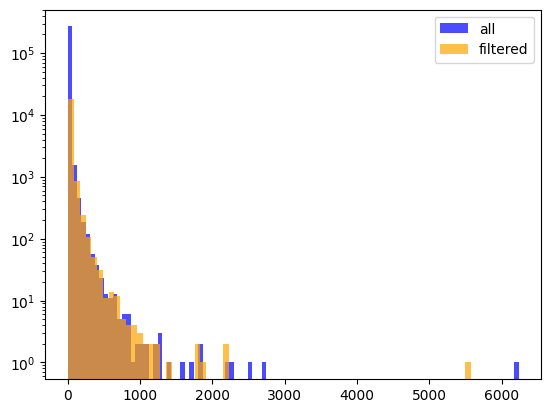

In [62]:
plt.hist([len(v) for v in seqs.values()], bins=100, alpha=0.7, label="all", color="blue")
plt.hist([len(v) for v in seqs_filtered.values()], bins=70, alpha=0.7, label="filtered", color="orange")
plt.yscale("log")
plt.legend()
plt.show()